<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C3/W3/ungraded_labs/C3_W3_Lab_5_sarcasm_with_bi_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: Training a Sarcasm Detection Model using Bidirectional LSTMs

In this lab, you will revisit the [News Headlines Dataset for Sarcasm Detection](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection/home) dataset and use it to train a Bi-LSTM Model.


## Download the Dataset

First, you will download the JSON file and extract the contents into lists.

In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2024-05-06 10:18:21--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.196.207, 173.194.197.207, 173.194.198.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2024-05-06 10:18:21 (138 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [ ]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

## Split the Dataset

You will then split the lists into train and test sets.

In [ ]:
training_size = 20000

# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]



```
# This is formatted as code
```

## Data preprocessing

Next, you will generate the vocabulary and padded sequences.

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

## Build and Compile the Model

The architecture here is almost identical to the one you used in the previous lab with the IMDB Reviews. Try to tweak the parameters and see how it affects the training time and accuracy (both training and validation).

In [ ]:
import tensorflow as tf

# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 24

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 174129 (680.19 KB)
Trainable params: 174129 (680.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the Model

In [ ]:
NUM_EPOCHS = 10

# Train the model
history_lstm = model_lstm.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 30s 35ms/step - loss: 0.4123 - accuracy: 0.7993 - val_loss: 0.3526 - val_accuracy: 0.8463
Epoch 2/10
625/625 [==============================] - 10s 15ms/step - loss: 0.2133 - accuracy: 0.9123 - val_loss: 0.3327 - val_accuracy: 0.8629
Epoch 3/10
625/625 [==============================] - 8s 14ms/step - loss: 0.1289 - accuracy: 0.9509 - val_loss: 0.4023 - val_accuracy: 0.8547
Epoch 4/10
625/625 [==============================] - 9s 15ms/step - loss: 0.0780 - accuracy: 0.9731 - val_loss: 0.5078 - val_accuracy: 0.8392
Epoch 5/10
625/625 [==============================] - 9s 14ms/step - loss: 0.0482 - accuracy: 0.9841 - val_loss: 0.6033 - val_accuracy: 0.8413
Epoch 6/10
625/625 [==============================] - 8s 13ms/step - loss: 0.0304 - accuracy: 0.9904 - val_loss: 0.7036 - val_accuracy: 0.8363
Epoch 7/10
625/625 [==============================] - 9s 14ms/step - loss: 0.0199 - accuracy: 0.9943 - val_loss: 0.8198 - val_accuracy: 0.83

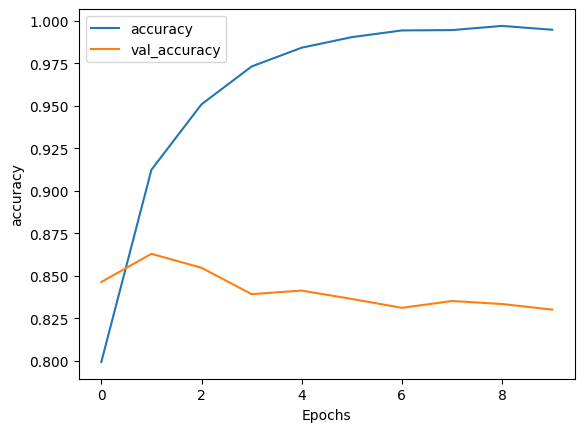

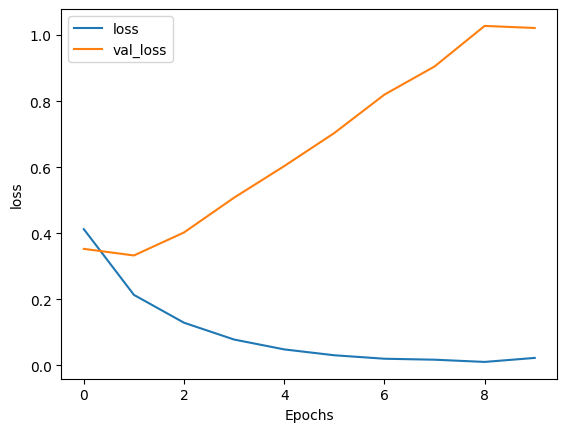

In [ ]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

## Reduced vocabulary

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 1000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [ ]:
import tensorflow as tf

# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 24

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           16000     
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                12544     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 24)                1560      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 30129 (117.69 KB)
Trainable params: 30129 (117.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
NUM_EPOCHS = 10

# Train the model
history_lstm_redvocab = model_lstm.fit(
    training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 27s 36ms/step - loss: 0.4503 - accuracy: 0.7752 - val_loss: 0.4056 - val_accuracy: 0.8129
Epoch 2/10
625/625 [==============================] - 11s 18ms/step - loss: 0.3573 - accuracy: 0.8357 - val_loss: 0.3789 - val_accuracy: 0.8281
Epoch 3/10
625/625 [==============================] - 10s 15ms/step - loss: 0.3300 - accuracy: 0.8508 - val_loss: 0.3742 - val_accuracy: 0.8311
Epoch 4/10
625/625 [==============================] - 8s 13ms/step - loss: 0.3118 - accuracy: 0.8610 - val_loss: 0.3754 - val_accuracy: 0.8337
Epoch 5/10
625/625 [==============================] - 9s 14ms/step - loss: 0.2990 - accuracy: 0.8666 - val_loss: 0.3755 - val_accuracy: 0.8320
Epoch 6/10
625/625 [==============================] - 9s 14ms/step - loss: 0.2889 - accuracy: 0.8726 - val_loss: 0.4144 - val_accuracy: 0.8177
Epoch 7/10
625/625 [==============================] - 10s 16ms/step - loss: 0.2798 - accuracy: 0.8759 - val_loss: 0.3881 - val_accuracy: 0.

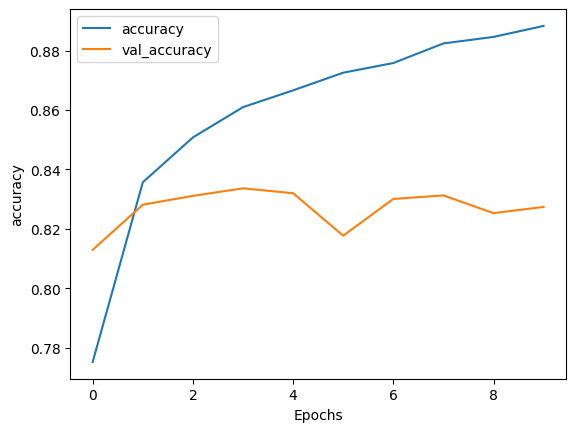

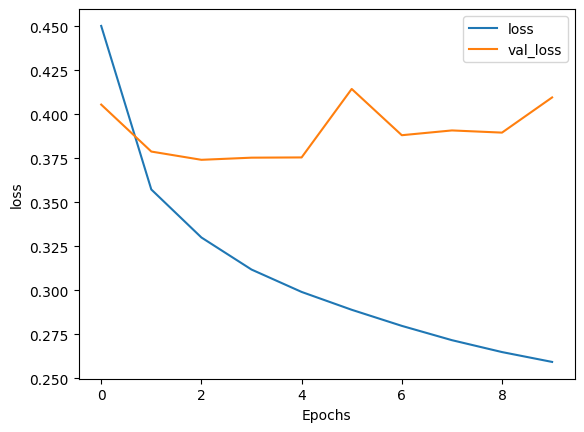

In [ ]:
# Plot the accuracy and loss history
plot_graphs(history_lstm_redvocab, 'accuracy')
plot_graphs(history_lstm_redvocab, 'loss')

### Reduced vocabulary with more hidden units

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 1000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [ ]:
import tensorflow as tf

# Parameters
embedding_dim = 16
lstm_dim = 64
dense_dim = 24

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           16000     
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               41472     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 24)                3096      
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 60593 (236.69 KB)
Trainable params: 60593 (236.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
NUM_EPOCHS = 10

# Train the model
history_lstm_redvocab = model_lstm.fit(
    training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 22s 31ms/step - loss: 0.4776 - accuracy: 0.7539 - val_loss: 0.3876 - val_accuracy: 0.8201
Epoch 2/10
625/625 [==============================] - 9s 15ms/step - loss: 0.3590 - accuracy: 0.8354 - val_loss: 0.3778 - val_accuracy: 0.8274
Epoch 3/10
625/625 [==============================] - 9s 15ms/step - loss: 0.3343 - accuracy: 0.8478 - val_loss: 0.3807 - val_accuracy: 0.8223
Epoch 4/10
625/625 [==============================] - 10s 16ms/step - loss: 0.3140 - accuracy: 0.8597 - val_loss: 0.3778 - val_accuracy: 0.8316
Epoch 5/10
625/625 [==============================] - 9s 15ms/step - loss: 0.2998 - accuracy: 0.8663 - val_loss: 0.3772 - val_accuracy: 0.8301
Epoch 6/10
625/625 [==============================] - 8s 12ms/step - loss: 0.2879 - accuracy: 0.8729 - val_loss: 0.3956 - val_accuracy: 0.8314
Epoch 7/10
625/625 [==============================] - 8s 13ms/step - loss: 0.2808 - accuracy: 0.8760 - val_loss: 0.3862 - val_accuracy: 0.82

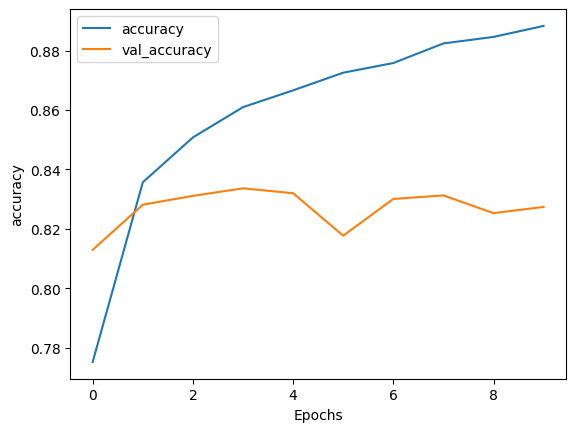

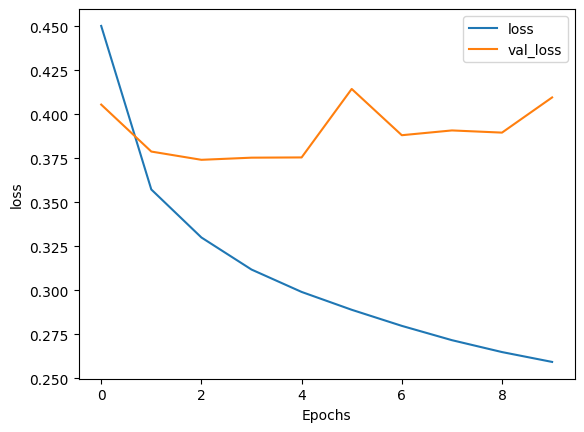

In [ ]:
# Plot the accuracy and loss history
plot_graphs(history_lstm_redvocab, 'accuracy')
plot_graphs(history_lstm_redvocab, 'loss')